# Internet Bandwidth Prediction

**Author:** Huong Nguyen / 天香 / Christineee <3

In [34]:
!pip install statsmodels sm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sm: filename=sm-0.1.8-py3-none-any.whl size=4565 sha256=fce844edc9b0ccdd255e6ac77db5c9ac81caf2fc7b64e460c49c132bf0dbf1c6
  Stored in directory: /Users/nnthienhuong/Library/Caches/pip/wheels/4c/99/ad/52424fa96716ea5aafc171d838ace8daad99df8cefad34402a
Successfully built sm

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


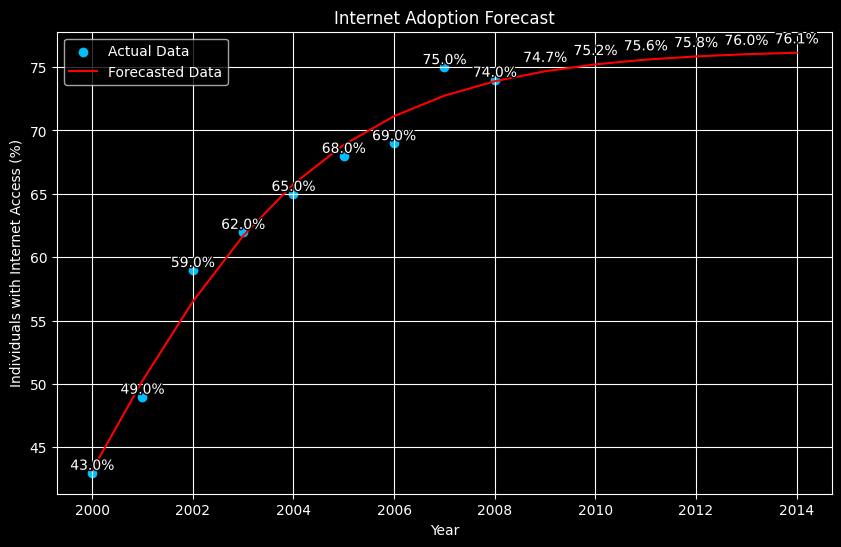

Fitted parameters: L=76.38, k=0.390, x0=1999.32
R-squared: 0.9799


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patheffects as path_effects

# Load CSV
data_usage = pd.read_csv(
    "/Users/nnthienhuong/Documents/MSBA - Trimester 1/AN6008 - Application of Statistics/Case Presentation/internet_data_usage.csv",
    sep=";"
)

# Prepare data
years = data_usage['year'].values
usage = data_usage['user_percentage'].values

# Logistic function
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Initial guesses
initial_guess = [max(usage), 0.3, np.median(years)]

# Fit logistic curve
params, covariance = curve_fit(logistic, years, usage, p0=initial_guess)
L, k, x0 = params

# Create fitted values
years_fit = np.arange(min(years), 2015)
usage_fit = logistic(years_fit, L, k, x0)

# Plot actual data and logistic fit
plt.figure(figsize=(10, 6))
plt.scatter(years, usage, label='Actual Data', color='#00BFFF')
plt.plot(years_fit, usage_fit, label='Forecasted Data', color='red')


# Annotate actual data points
for x, y in zip(years, usage):
    plt.text(
        x, y, f"{y:.1f}%",
        fontsize=10, ha='center', va='bottom',
        color='white',
        path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')]
    )

# Annotate forecasted points
for x, y in zip(years_fit, usage_fit):
    if x > years.max():
        plt.text(
            x, y + 0.5, f"{y:.1f}%",  # shift up 0.5%
            fontsize=10, ha='center', va='bottom',
            color='white',
            path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')]
        )


plt.xlabel('Year')
plt.ylabel('Individuals with Internet Access (%)')
plt.title('Internet Adoption Forecast')
plt.legend()
plt.grid(True)
plt.style.use('dark_background')
plt.show()

# Print fitted parameters
print(f"Fitted parameters: L={L:.2f}, k={k:.3f}, x0={x0:.2f}")

# Verify model (R² calculation)
residuals = usage - logistic(years, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((usage - np.mean(usage))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")



=== OLS Regression Summary (Exponential Model on log scale) ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     444.7
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           5.24e-12
Time:                        22:31:25   Log-Likelihood:                -4.9028
No. Observations:                  16   AIC:                             13.81
Df Residuals:                      14   BIC:                             15.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

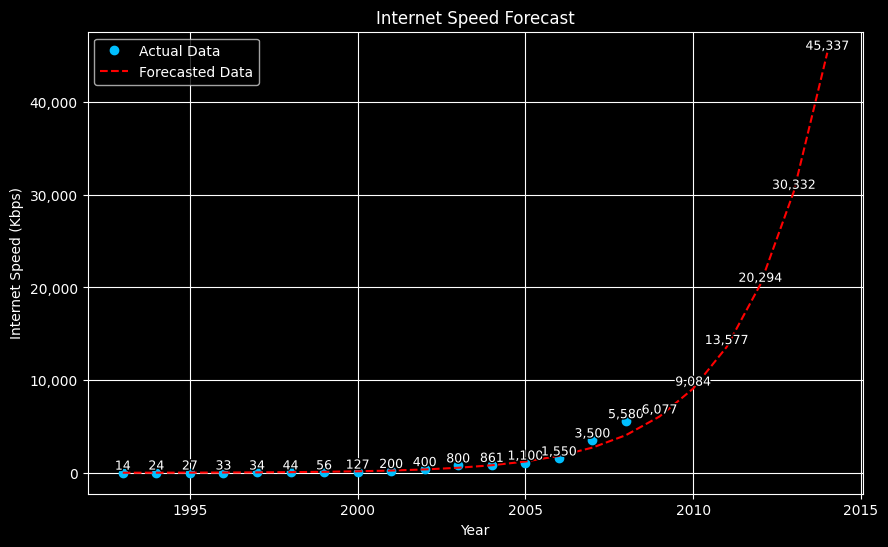

    year  forecast_internet_speed_exp
0   1993                     9.795025
1   1994                    14.640335
2   1995                    21.882477
3   1996                    32.707093
4   1997                    48.886328
5   1998                    73.068954
6   1999                   109.214011
7   2000                   163.238964
8   2001                   243.988469
9   2002                   364.682373
10  2003                   545.079996
11  2004                   814.715005
12  2005                  1217.730507
13  2006                  1820.105900
14  2007                  2720.458648
15  2008                  4066.189364
16  2009                  6077.613405
17  2010                  9084.029639
18  2011                 13577.631379
19  2012                 20294.085466
20  2013                 30332.971444
21  2014                 45337.798453


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import FuncFormatter

# Load internet speed data
data_speed = pd.read_csv(
    "/Users/nnthienhuong/Documents/MSBA - Trimester 1/AN6008 - Application of Statistics/Case Presentation/internet_speed_data.csv",
    sep=";"
)

# Prepare data
X_speed = data_speed['year'].values
y_speed = data_speed['internet_speed'].values

# Years relative to first data point
t = X_speed - X_speed.min()

# Validation using OLS on log(y)
X_ols = sm.add_constant(t)  # add intercept
ols_model = sm.OLS(np.log(y_speed), X_ols).fit()

# Show summary table
print("\n=== OLS Regression Summary (Exponential Model on log scale) ===")
print(ols_model.summary())

# Extract coefficients for forecast
intercept, slope = ols_model.params
a = np.exp(intercept)
b = slope

# Forecast years 1998–2014 (inclusive)
forecast_years_speed = np.arange(X_speed.min(), 2015)
t_forecast = forecast_years_speed - X_speed.min()
forecast_speed_exp = a * np.exp(b * t_forecast)

# Plot
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))

# Actual data
ax.plot(X_speed, y_speed, 'o', label='Actual Data', color='#00BFFF')

# Forecast line (dashed red)
ax.plot(forecast_years_speed, forecast_speed_exp, 'r--', label='Forecasted Data')

# Annotate actual data
for x, y in zip(X_speed, y_speed):
    ax.text(
        x, y, f"{int(y):,}",
        fontsize=9, ha='center', va='bottom',
        color='white',
        path_effects=[path_effects.withStroke(linewidth=2, foreground='black')]
    )

# Annotate forecast points only after last actual year
for x, y in zip(forecast_years_speed, forecast_speed_exp):
    if x > X_speed.max():
        ax.text(
            x, y, f"{int(y):,}",
            fontsize=9, ha='center', va='bottom',
            color='white',
            path_effects=[path_effects.withStroke(linewidth=2, foreground='black')]
        )

# Labels & title
ax.set_xlabel('Year', color='white')
ax.set_ylabel('Internet Speed (Kbps)', color='white')
ax.set_title('Internet Speed Forecast', color='white')

# Format y-axis with comma
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax.legend()
ax.grid(True)

plt.show()

# Forecast table
forecast_table_speed = pd.DataFrame({
    'year': forecast_years_speed,
    'forecast_internet_speed_exp': forecast_speed_exp
})
print(forecast_table_speed)
